# Interpolation transform

**Purpose of script:**

Convert the microwave data (netCDF or tif) and upscale to match the resoltion of the optical dataset
using the xarray.interp() method

- In: wm tif data, opt data
- Out: mw upscaled tif data


## Prep

Imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import rioxarray
import xarray
import rasterio
import gdal

%matplotlib inline

Relevant paths:

In [3]:
mw_path = r"../Data/microwave-rs/mw-tif"
opt_path = r"../Data/optical-rs/2019-07-01_grain_diameter.tif"

In [4]:
mw_interpolated_out =  r"../Data/microwave-rs/mw_interpolated"

Data load:

In [5]:
# load opt cropped data
# load mw tif data

In [6]:
data_opt = xarray.open_dataarray(opt_path)

In [7]:
# load all tiff files

In [8]:
# tfs_opt = [os.path.join(opt_dir_path, f) for f in os.listdir(opt_dir_path) if f.endswith(".tif")]	
# data_opt = []
# for f in tfs_opt:
#     data_opt.append(rioxarray.open_rasterio(f, masked=True))

Interpolation:

In [9]:
x_new = data_opt['x']
y_new = data_opt['y']

In [10]:
# for each tif file

# load 1 only for now:

mw_path_tif = r"../Data/microwave-rs/mw-tif/2019-07-01_mw.tif"
data_mw_tif = xarray.open_dataarray(mw_path_tif)


In [11]:
test3 = data_mw_tif.interp(x=x_new, y=y_new, method="nearest")

Drop nan:

In [ ]:
#test3.dropna(dim="band", how="any") # nope
#test3.drop(band=np.nan)

In [30]:
test3[0].shape

(2687, 1487)

In [19]:
data_opt[0][:-24, :-25]

<xarray.DataArray 'band_data' (y: 2663, x: 1462)>
[3893306 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -6.365e+05 -6.355e+05 ... 8.235e+05 8.245e+05
  * y            (y) float64 -6.625e+05 -6.635e+05 ... -3.324e+06 -3.324e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area

In [17]:
# test3[0][:-23, :-24]
test4 = test3[0][:-24, :-25]


np.isnan(test4).sum()

<xarray.DataArray 'band_data' ()>
array(0)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

Plot:

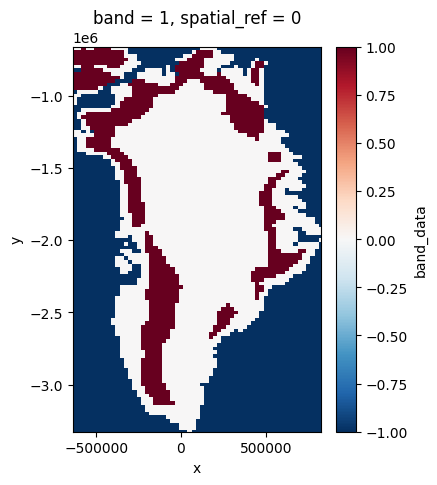

In [18]:
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test4.plot(ax=axes)
plt.draw()

In [ ]:
# next script - put to dataset

In [20]:
test4.to_pandas()

x,-636500.0,-635500.0,-634500.0,-633500.0,-632500.0,-631500.0,-630500.0,-629500.0,-628500.0,-627500.0,...,815500.0,816500.0,817500.0,818500.0,819500.0,820500.0,821500.0,822500.0,823500.0,824500.0
y,,,,,,,,,,,,,,,,,,,,,
-662500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
-663500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
-664500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
-665500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
-666500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-3320500.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
-3321500.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
-3322500.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [21]:
# need to include date, fix y, add pooled, neighbours, ...
# test4.to_pandas()
test4.to_dataframe()

band  spatial_ref  band_data
y          x                                      
-662500.0  -636500.0     1            0        0.0
           -635500.0     1            0        0.0
           -634500.0     1            0        0.0
           -633500.0     1            0        0.0
           -632500.0     1            0        0.0
...                    ...          ...        ...
-3324500.0  820500.0     1            0       -1.0
            821500.0     1            0       -1.0
            822500.0     1            0       -1.0
            823500.0     1            0       -1.0
            824500.0     1            0       -1.0

[3893306 rows x 3 columns]